# analysis of RNA editing levels as determined by Rna Editing Indexer
## Rna seq data muscle, spleen, blood: "PB" (main cohort)

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import os
import seaborn as sns
import math



### 4 wpi - all organs

In [23]:
# read AEI and extract sample ID
os.chdir("/Users/karlfrontzek/Documents/UCL/rna_editing/prion/")
wpi4=pd.read_csv("AEI_peripheralOrgans_4wpi.csv")
#brain_aei['Sample']=brain_aei['Sample']+"_Hp" # add _Hp in sample ID

In [24]:
# read meta-data and extract ID
peri_meta=pd.read_csv("meta_p3506_PeripheralSamples.csv",sep=";")
peri_meta.columns=['TubeID','SampleID','Treatment','wpi','Region']
peri_meta.head()

,TubeID,SampleID,Treatment,wpi,Region
0,p1608_4212/19,PB-11_blood,RML6,4,blood
1,p1608_4211/55,PB-11_muscle,RML6,4,muscle
2,p1608_4211/19,PB-11_spleen,RML6,4,spleen
3,p1608_4212/38,PB-14_blood,NBH,4,blood
4,p1608_4211/92,PB-14_muscle,NBH,4,muscle


In [25]:
wpi4['Sample']=wpi4['Sample'].str[11:] # harmonize sample ID
wpi4['Sample'][10]='PB-9_spleen'

/Users/karlfrontzek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# inner join aei and meta
wpi4_merge=wpi4.merge(peri_meta,left_on="Sample",right_on="SampleID")

In [27]:
wpi4_merge.drop(0,inplace=True) # drop duplicate from first line

### 8 wpi - all organs

In [28]:
# read AEI and extract sample ID
os.chdir("/Users/karlfrontzek/Documents/UCL/rna_editing/prion/")
wpi8=pd.read_csv("AEI_peripheralOrgans_8wpi.csv")
#brain_aei['Sample']=brain_aei['Sample']+"_Hp" # add _Hp in sample ID

In [29]:
wpi8['Sample']=wpi8['Sample'].str[11:] # harmonize sample ID


In [30]:
# inner join aei and meta
wpi8_merge=wpi8.merge(peri_meta,left_on="Sample",right_on="SampleID")

### 12-16 wpi - all organs

In [31]:
# read AEI and extract sample ID
os.chdir("/Users/karlfrontzek/Documents/UCL/rna_editing/prion/")
wpi1216=pd.read_csv("AEI_peripheralOrgans_12-16wpi.csv")
#brain_aei['Sample']=brain_aei['Sample']+"_Hp" # add _Hp in sample ID

In [32]:
wpi1216['Sample']=wpi1216['Sample'].str[11:] # harmonize sample ID


In [33]:
# inner join aei and meta
wpi1216_merge=wpi1216.merge(peri_meta,left_on="Sample",right_on="SampleID")

### 18-term wpi - all organs

In [34]:
# read AEI and extract sample ID
os.chdir("/Users/karlfrontzek/Documents/UCL/rna_editing/prion/")
wpi18term=pd.read_csv("AEI_peripheralOrgans_18-term.csv")
#brain_aei['Sample']=brain_aei['Sample']+"_Hp" # add _Hp in sample ID

In [35]:
wpi18term['Sample']=wpi18term['Sample'].str[11:] # harmonize sample ID


In [36]:
# inner join aei and meta
wpi18term_merge=wpi18term.merge(peri_meta,left_on="Sample",right_on="SampleID")

## for presentation

In [37]:
df_merged=wpi4_merge.append([wpi8_merge,wpi1216_merge,wpi18term_merge]) # merge all dataframes

In [38]:
df_merged['wpi'].loc[df_merged['wpi'] == 'term']='22' # rename term to 22

In [39]:
df_merged['wpi']=df_merged['wpi'].astype('int64') # convert wpi to int64

### blood

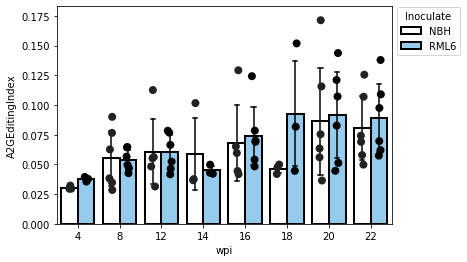

In [40]:
# plot term wpi
tips = df_merged.loc[df_merged['Region']=='blood']
palette=[color for color in ["white","lightskyblue"]*8] 
hue_order=["NBH","RML6"]
ax = sns.barplot(
    x='wpi',
    y='A2GEditingIndex',
    hue='Treatment',
    data=tips, 
    ci="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=1,
    linewidth=2,
    hue_order=hue_order,
    palette=palette
)

sns.stripplot(
     x='wpi',
    y='A2GEditingIndex',
    hue='Treatment',
    hue_order=hue_order,
    data=tips, dodge=True, alpha=1, size=8, color="black",ax=ax
)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
#ax.set(ylim=(0,1))
ax.legend(handles[2:], labels[2:], title='Inoculate', bbox_to_anchor=(1, 1.02), loc='upper left')
ax.figure.savefig('blood_AEI.png',bbox_inches="tight")

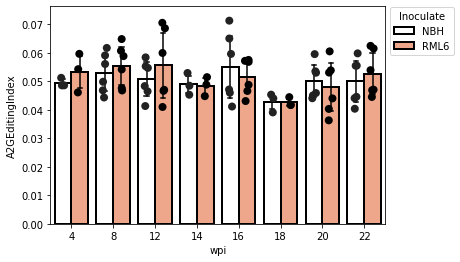

In [41]:
# plot muscle
tips = df_merged.loc[df_merged['Region']=='muscle']
palette=[color for color in ["white","lightsalmon"]*8] 
hue_order=["NBH","RML6"]
ax = sns.barplot(
    x='wpi',
    y='A2GEditingIndex',
    hue='Treatment',
    data=tips, 
    ci="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=1,
    linewidth=2,
    hue_order=hue_order,
    palette=palette
)

sns.stripplot(
     x='wpi',
    y='A2GEditingIndex',
    hue='Treatment',
    hue_order=hue_order,
    data=tips, dodge=True, alpha=1, size=8, color="black",ax=ax
)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
#ax.set(ylim=(0,1))
ax.legend(handles[2:], labels[2:], title='Inoculate', bbox_to_anchor=(1, 1.02), loc='upper left')
ax.figure.savefig('muscle_AEI.png',bbox_inches="tight")

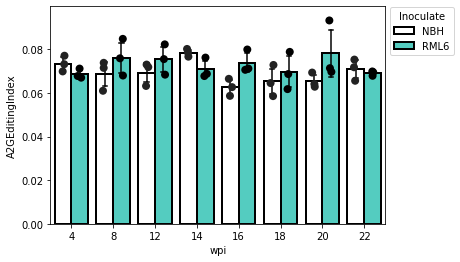

In [42]:
# plot spleen
tips = df_merged.loc[df_merged['Region']=='spleen']
palette=[color for color in ["white","turquoise"]*8] 
hue_order=["NBH","RML6"]
ax = sns.barplot(
    x='wpi',
    y='A2GEditingIndex',
    hue='Treatment',
    data=tips, 
    ci="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=1,
    linewidth=2,
    hue_order=hue_order,
    palette=palette
)

sns.stripplot(
     x='wpi',
    y='A2GEditingIndex',
    hue='Treatment',
    hue_order=hue_order,
    data=tips, dodge=True, alpha=1, size=8, color="black",ax=ax
)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
#ax.set(ylim=(0,1))
ax.legend(handles[2:], labels[2:], title='Inoculate', bbox_to_anchor=(1, 1.02), loc='upper left')
ax.figure.savefig('spleen_AEI.png',bbox_inches="tight")

# PBO cohort = prion inoculation in 1 year-old mice

In [43]:
pbo_aei=pd.read_csv("AEI_PBO.csv") # read file
pbo_aei.head()

,StrandDecidingMethod,Group,Sample,SamplePath,A2CEditingIndex,A2GEditingIndex,A2TEditingIndex,C2AEditingIndex,C2GEditingIndex,C2TEditingIndex
0,RefSeqThenMMSites,Editing_Index_Unknown,20190828.B-PBO-C5_blood_,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-C5...,0.012400,0.130631,0.014817,0.018420,0.008641,0.054446
1,RefSeqThenMMSites,Editing_Index_Unknown,20190828.B-PBO-D3_blood_,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-D3...,0.011142,0.099194,0.015071,0.015696,0.008654,0.055376
2,RefSeqThenMMSites,Editing_Index_Unknown,20190828.B-PBO-C2_blood_,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-C2...,0.009458,0.191957,0.012950,0.016588,0.007430,0.046746
3,RefSeqThenMMSites,Editing_Index_Unknown,20190828.B-PBO-D2_blood_,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-D2...,0.007655,0.065074,0.011536,0.014593,0.007236,0.042282
4,RefSeqThenMMSites,Editing_Index_Unknown,20190821.B-PBO-C2_muscle_,/mnt/vol3/BulkRnaSeq/PBO/bam/20190821.B-PBO-C2...,0.005787,0.054731,0.010108,0.013663,0.005724,0.036200


In [44]:
pbo_aei['Organ']=0
pbo_aei['Organ'].loc[pbo_aei['Sample'].str.contains('blood')]='blood' # assign organs
pbo_aei['Organ'].loc[pbo_aei['Sample'].str.contains('muscle')]='muscle'

In [45]:
pbo_aei['Sample']=pbo_aei['Sample'].str[11:-1] # harmonize sample ID


In [46]:
# inner join aei and meta
pbo_merge=pbo_aei.merge(peri_meta,left_on="Sample",right_on="SampleID")

In [47]:
pbo_merge.head()

,StrandDecidingMethod,Group,Sample,SamplePath,A2CEditingIndex,A2GEditingIndex,A2TEditingIndex,C2AEditingIndex,C2GEditingIndex,C2TEditingIndex,Organ,TubeID,SampleID,Treatment,wpi,Region
0,RefSeqThenMMSites,Editing_Index_Unknown,PBO-C5_blood,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-C5...,0.012400,0.130631,0.014817,0.018420,0.008641,0.054446,blood,p1608_5588/82,PBO-C5_blood,RML6_old,8,blood
1,RefSeqThenMMSites,Editing_Index_Unknown,PBO-D3_blood,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-D3...,0.011142,0.099194,0.015071,0.015696,0.008654,0.055376,blood,p1608_5588/83,PBO-D3_blood,NBH_old,8,blood
2,RefSeqThenMMSites,Editing_Index_Unknown,PBO-C2_blood,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-C2...,0.009458,0.191957,0.012950,0.016588,0.007430,0.046746,blood,p1608_5588/55,PBO-C2_blood,RML6_old,8,blood
3,RefSeqThenMMSites,Editing_Index_Unknown,PBO-D2_blood,/mnt/vol3/BulkRnaSeq/PBO/bam/20190828.B-PBO-D2...,0.007655,0.065074,0.011536,0.014593,0.007236,0.042282,blood,p1608_5588/69,PBO-D2_blood,NBH_old,8,blood
4,RefSeqThenMMSites,Editing_Index_Unknown,PBO-C2_muscle,/mnt/vol3/BulkRnaSeq/PBO/bam/20190821.B-PBO-C2...,0.005787,0.054731,0.010108,0.013663,0.005724,0.036200,muscle,p1608_5588/13,PBO-C2_muscle,RML6_old,8,muscle


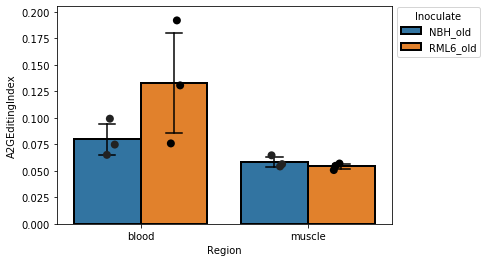

In [48]:
# plot PBO
tips = pbo_merge
#palette=[color for color in ["HotPink1","HotPink4","seashell2","seashell4"]] 
hue_order=["NBH_old","RML6_old"]
ax = sns.barplot(
    x='Region',
    y='A2GEditingIndex',
    hue='Treatment',
    data=tips, 
    ci="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=1,
    linewidth=2,
    hue_order=hue_order
)

sns.stripplot(
    x='Region',
    y='A2GEditingIndex',
    hue='Treatment',
    hue_order=hue_order,
    data=tips, dodge=True, alpha=1, size=8, color="black",ax=ax
)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
#ax.set(ylim=(0,1))
ax.legend(handles[2:], labels[2:], title='Inoculate', bbox_to_anchor=(1, 1.02), loc='upper left')
#ax.figure.savefig('spleen_AEI.png',bbox_inches="tight")

# Analysis of data from Kanata et al.

In [49]:
zerr=pd.read_csv("AEI_ZERR.csv") # read Aei data

In [50]:
zerr['Sample']=zerr['Sample'].str.split("_",expand=True)[0].str[3:]

In [51]:
zerrmeta=pd.read_csv("Zerrmeta.csv") # read kanata&zerr metadata

In [52]:
zerrmet=pd.DataFrame({'SRR': [],'Treatment': []}) # add SRR and treatment ids

In [53]:
zerrmeta.columns=['in']

In [54]:
zerrmet['SRR']=zerrmeta['in'].str.extract('SRR(.{,7})')[0]

In [55]:
zerrmet['Treatment']=zerrmeta["in"].str.split(":",expand=True)[1].str.split(";",expand=True)[0] # assign Treatment

In [56]:
aei_zerr=zerr.merge(zerrmet,left_on="Sample",right_on="SRR") # merge AEI and metadata

In [57]:
aei_zerr['Group'].loc[aei_zerr['Treatment'].str.contains("MM")]="MM"
aei_zerr['Group'].loc[aei_zerr['Treatment'].str.contains("Con")]="Con" # assign inoculates

In [58]:
aei_zerr['dpi']=1 # assign dates
aei_zerr['dpi'].loc[aei_zerr['Treatment'].str.contains("120")]=120
aei_zerr['dpi'].loc[aei_zerr['Treatment'].str.contains("180")]=180

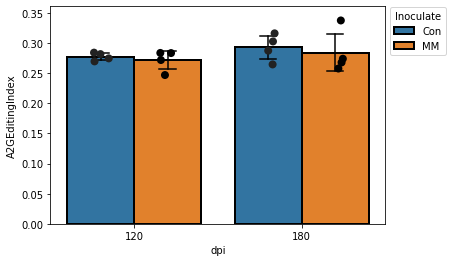

In [59]:
# plot zerr
tips = aei_zerr
#palette=[color for color in ["HotPink1","HotPink4","seashell2","seashell4"]] 
hue_order=["Con","MM"]
ax = sns.barplot(
    x='dpi',
    y='A2GEditingIndex',
    hue='Group',
    data=tips, 
    ci="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=1,
    linewidth=2,
    hue_order=hue_order
)

sns.stripplot(
    x='dpi',
    y='A2GEditingIndex',
    hue='Group',
    hue_order=hue_order,
    data=tips, dodge=True, alpha=1, size=8, color="black",ax=ax
)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
#ax.set(ylim=(0,1))
ax.legend(handles[2:], labels[2:], title='Inoculate', bbox_to_anchor=(1, 1.02), loc='upper left')
#ax.figure.savefig('spleen_AEI.png',bbox_inches="tight")

# PBH cohort: contralateral prion inoculation 

In [75]:
pbh_aei=pd.read_csv("AEI_PBH.csv") # read file
pbh_aei.head()

,StrandDecidingMethod,Group,Sample,SamplePath,A2CEditingIndex,A2GEditingIndex,A2TEditingIndex,C2AEditingIndex,C2GEditingIndex,C2TEditingIndex
0,RefSeqThenMMSites,Editing_Index_Unknown,20190828.B-PBH-12_blood,/mnt/vol3/BulkRnaSeq/PBH/bam/20190828.B-PBH-12...,0.012121,0.068954,0.014020,0.018570,0.010161,0.060681
1,RefSeqThenMMSites,Editing_Index_Unknown,20190821.B-PBH-12_muscle,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-12...,0.006492,0.065540,0.010147,0.013572,0.005697,0.037483
2,RefSeqThenMMSites,Editing_Index_Unknown,20190821.B-PBH-7_muscle,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-7_...,0.006618,0.066193,0.010257,0.013423,0.005779,0.037081
3,RefSeqThenMMSites,Editing_Index_Unknown,20190821.B-PBH-10_muscle,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-10...,0.006556,0.058615,0.009472,0.013074,0.005323,0.036863
4,RefSeqThenMMSites,Editing_Index_Unknown,20190821.B-PBH-10_blood,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-10...,0.008876,0.057697,0.012182,0.014658,0.007140,0.049714


In [76]:
pbh_aei['Organ']=0 # assign organ
pbh_aei['Organ'].loc[pbh_aei['Sample'].str.contains('blood')]='blood'
pbh_aei['Organ'].loc[pbh_aei['Sample'].str.contains('muscle')]='muscle'

In [77]:
pbh_aei['Sample']=pbh_aei['Sample'].str.split("B-",expand=True)[1] # assign sample name

In [78]:
# inner join aei and meta
pbh_merge=pbh_aei.merge(peri_meta,left_on="Sample",right_on="SampleID")

In [79]:
pbh_merge.head()

,StrandDecidingMethod,Group,Sample,SamplePath,A2CEditingIndex,A2GEditingIndex,A2TEditingIndex,C2AEditingIndex,C2GEditingIndex,C2TEditingIndex,Organ,TubeID,SampleID,Treatment,wpi,Region
0,RefSeqThenMMSites,Editing_Index_Unknown,PBH-12_blood,/mnt/vol3/BulkRnaSeq/PBH/bam/20190828.B-PBH-12...,0.012121,0.068954,0.014020,0.018570,0.010161,0.060681,blood,p1608_5588/81,PBH-12_blood,NBH,8,blood
1,RefSeqThenMMSites,Editing_Index_Unknown,PBH-12_muscle,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-12...,0.006492,0.065540,0.010147,0.013572,0.005697,0.037483,muscle,p1608_5588/40,PBH-12_muscle,NBH,8,muscle
2,RefSeqThenMMSites,Editing_Index_Unknown,PBH-7_muscle,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-7_...,0.006618,0.066193,0.010257,0.013423,0.005779,0.037081,muscle,p1608_5588/11,PBH-7_muscle,RML6,8,muscle
3,RefSeqThenMMSites,Editing_Index_Unknown,PBH-10_muscle,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-10...,0.006556,0.058615,0.009472,0.013074,0.005323,0.036863,muscle,p1608_5588/12,PBH-10_muscle,NBH,8,muscle
4,RefSeqThenMMSites,Editing_Index_Unknown,PBH-10_blood,/mnt/vol3/BulkRnaSeq/PBH/bam/20190821.B-PBH-10...,0.008876,0.057697,0.012182,0.014658,0.007140,0.049714,blood,p1608_5588/54,PBH-10_blood,NBH,8,blood


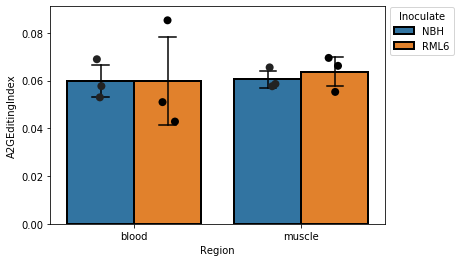

In [80]:
# plot PBH
tips = pbh_merge
#palette=[color for color in ["HotPink1","HotPink4","seashell2","seashell4"]] 
hue_order=["NBH","RML6"]
ax = sns.barplot(
    x='Region',
    y='A2GEditingIndex',
    hue='Treatment',
    data=tips, 
    ci="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=1,
    linewidth=2,
    hue_order=hue_order
)

sns.stripplot(
    x='Region',
    y='A2GEditingIndex',
    hue='Treatment',
    hue_order=hue_order,
    data=tips, dodge=True, alpha=1, size=8, color="black",ax=ax
)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
#ax.set(ylim=(0,1))
ax.legend(handles[2:], labels[2:], title='Inoculate', bbox_to_anchor=(1, 1.02), loc='upper left')
#ax.figure.savefig('spleen_AEI.png',bbox_inches="tight")